<center> <h1>Predicción de Precio de Alquiler de Airbnb</h1> </center>

Mi familia tiene un pequeño departamento vacío cerca de Scalabrini Ortiz y Santa Fe en el barrio de Palermo. Me pidieron que averigüe los precios para ver si es mejor listarlo en Airbnb o alquilarlo. Pensé que sería una buena idea:

1. Realizar un análisis exploratorio de los datos para observar la distribución de las características de los departamentos en la ciudad. 
2. Observar que variables afectan al precio de alquiler.
3. Entrenar un modelo de aprendizaje automático supervisado para predecir el precio de alquiler de Airbnb.


### Los datos

Los datos fueron descargados de la [página de Airbnb](http://insideairbnb.com/get-the-data.html) y corresponden al 22 de octubre del año 2020.

Estos contienen información acerca de la vivienda como sus prestaciones, localización, reseñas y precio.

## 1. Cargar y limpiar los datos

**Cargar las principales librerías necesarias** 

In [233]:
import pandas as pd 
import numpy as np 
import re
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import xgboost

pd.options.mode.chained_assignment = None

**Cargar los datos**

In [234]:
airbnb = pd.read_csv("Airbnb_data.csv")

**Explorar los datos** 

In [235]:
airbnb.shape

(20373, 74)

In [236]:
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20201026144537,2020-10-26,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.26
1,12463,https://www.airbnb.com/rooms/12463,20201026144537,2020-10-27,Room in Recoleta - awesome location,My apartment is centrally located in Recoleta ...,It's near the school of medicine so the street...,https://a0.muscache.com/pictures/11680256/57ef...,48799,https://www.airbnb.com/users/show/48799,...,10.0,10.0,10.0,NaN,f,1,0,1,0,0.15
2,13095,https://www.airbnb.com/rooms/13095,20201026144537,2020-10-27,Standard Room at Palermo Viejo B&B,Palermo Viejo B&B is a typical home in one of ...,NaN,https://a0.muscache.com/pictures/5397449/0096e...,50994,https://www.airbnb.com/users/show/50994,...,10.0,10.0,10.0,NaN,f,7,0,7,0,0.04


In [237]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

Muchas de estas columnas no son importantes para el análisis o son redundantes, este es el caso de la información de el/la host, metadatos (como el link de la publicación o una foto del inmueble), fecha en la que se escribieron las reseñas, etcétera...

In [238]:
columnas_no_interesantes = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 
       'host_location', 'host_about', 'host_response_time', 'host_response_rate', 
       'host_acceptance_rate', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
       'host_listings_count', 'host_total_listings_count', 'host_verifications',
       'minimum_nights', 'maximum_nights', 'license', 'instant_bookable',
       'host_has_profile_pic', 'host_identity_verified', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights', 'neighbourhood_group_cleansed',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped', 'number_of_reviews', 
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review',  'calculated_host_listings_count', 'neighbourhood',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms', "room_type",
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month' 
                           ]

airbnb.drop(columnas_no_interesantes, axis = 1, inplace = True)

In [239]:
airbnb.head(3)

,name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Amazing Luxurious Apt-Palermo Soho,t,Palermo,-34.58184,-58.42415,Entire condominium,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Microwave"", ""Cable TV"", ""Dishes and...","$4,688.00",95.0,10.0,10.0,10.0,10.0,10.0,10.0
1,Room in Recoleta - awesome location,f,Recoleta,-34.59761,-58.39468,Private room in apartment,1,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Cable TV"", ""TV"", ""Kitchen"", ""Bre...","$2,110.00",95.0,10.0,10.0,10.0,10.0,10.0,10.0
2,Standard Room at Palermo Viejo B&B,f,Villa Crespo,-34.59416,-58.43046,Private room in bed and breakfast,2,NaN,1 private bath,1.0,0.0,"[""Essentials"", ""Shampoo"", ""Cable TV"", ""Hair dr...","$3,517.00",100.0,10.0,10.0,10.0,10.0,10.0,10.0


In [240]:
airbnb.bathrooms.isnull().mean()

1.0

La columna "bathrooms" si bien por su nombre parecía poder ser de utilidad. está completamente vacía.

In [241]:
airbnb.drop("bathrooms", axis = 1, inplace = True)

Parece que los datos que deberían estar en esa columna pueden inferirse de "bathrooms_text". Haré dos columnas: una para la cantidad de baños y una para si son privados o compartidos.
Para esto debe utilizarse *RegEx (Regular Expresion)*

In [242]:
def inferir_bathrooms(string):
    '''
    Esta función devuelve la cantidad de baños y si son privados
    transformando el string ingresado como input
    '''  
    string = re.sub(".baño.", "", string)
    string = re.sub("[Hh]alf", "0.5", string)
    shared = re.search("[Ss]hared", string)
    if shared:
        privado = 0
    else: 
        privado = 1 #Si no dice especificamente que es compartido se asume que es privado
    
    cantidad = re.search("[+-]?([0-9]*[.])?[0-9]+", string).group()
    cantidad = float(cantidad)
    
    return cantidad, privado

In [243]:
airbnb['bathrooms_text'] = airbnb.bathrooms_text.map(inferir_bathrooms, na_action= 'ignore')
airbnb["baños"] = airbnb['bathrooms_text'].map(lambda x: x[0], na_action= 'ignore')
airbnb["es_privado"] = airbnb['bathrooms_text'].map(lambda x: x[1], na_action= 'ignore')
airbnb.drop("bathrooms_text", axis = 1, inplace = True)

Los valores de la columna 'price' son *string* en lugar de *float*. En otras palabras es necesario cambiar el formato de los precios a números para poder operar con ellos.

In [244]:
airbnb.price = airbnb.price.map(lambda x: x.replace('$', '').replace(',', '')).astype('float32')

La columa "amenities" tiene información que podría ser importante, pero es necesario cambiar su formato para poder utilizarla.

In [245]:
def quitar_caracteres_problematicos(string):
    '''
    Esta función le quita los corchetes y las comillas dobles
    al string ingresado como input
    '''
    caracteres = [' [ ' , ' ] ' , ' " ']
    
    nuevo_string = string.replace('[', '').replace(']', '').replace('"', '')
    
    return nuevo_string

In [246]:
airbnb.amenities = airbnb.amenities.map(quitar_caracteres_problematicos)

In [247]:
amenities_posibles = set()
for conj_amenities in airbnb.amenities:
    lista_conj_amenities = conj_amenities.split(', ')
    for amenity in lista_conj_amenities:
        amenities_posibles.add(amenity)
        

In [318]:
len(amenities_posibles)

229

La cantidad de amenities posibles es inmensa (229) por lo que las reduciré a las más importantes:

-Estacionamiento gratis

-Wi-Fi

-Aire acondicionado

-Desayuno

-Cocina

-Pileta


In [249]:
airbnb["Pileta"] = airbnb.amenities.map(lambda x:  "Pool" in x).astype("int8")
airbnb["TV"] =  airbnb.amenities.map(lambda x:  "TV" in x).astype("int8")
airbnb["Aire acondicionado"] =  airbnb.amenities.map(lambda x:  "Air conditioning" in x).astype("int8")
airbnb["Desayuno"] =  airbnb.amenities.map(lambda x:  "Breakfast" in x).astype("int8")
airbnb["Estacionamiento gratis"] = airbnb.amenities.map(lambda x:  "Free " in x).astype("int8")
airbnb["Cocina"] = airbnb.amenities.map(lambda x:  "Kitchen" in x).astype("int8")

In [250]:
airbnb.drop("amenities", axis = 1, inplace = True)

Cantidad de valores por tipo de propiedad:

In [251]:
airbnb["property_type"].value_counts()

Entire apartment             14194
Private room in apartment     2368
Private room in house          925
Entire loft                    623
Entire condominium             481
                             ...  
Private room in floor            1
Campsite                         1
Entire in-law                    1
Entire bed and breakfast         1
Pension                          1
Name: property_type, Length: 67, dtype: int64

Como puede observarse en la lista, hay muchos tipos de propiedades en los datos (67), algunos de los cuales solo representan a muy pocas (por ejemplo "boat" o "pensión", que solo tienen un inmueble asociado). Para hacer más sencillo el análisis (y para que el modelo pueda entrenarse mas eficientemente) descartaré aquellos tipos de propiedades que representen menos del 1% de los datos.

In [252]:
vc = airbnb.property_type.value_counts()
airbnb = airbnb[airbnb.property_type.isin(vc.index[vc.values > 0.01 * len(airbnb)])]

Aún quedan algunas tareas de limpieza pendientes como pasar las variables categóricas a números (ya que los modelos no pueden trabajar con estas) e imputar algunos valores faltantes, pero eso lo haré después de terminar el análisis exploratorio de los datos.

## 2. Análisis exploratorio de datos

En este punto es momento de responder las inquietudes iniciales:

   * **¿Cómo se distribuyen los datos?**

   * **¿Qué variables afectan al precio?**   
   
   
¿Qué barrios tienen las propiedades más caras?, ¿cómo se distribuye el precio de los inmuebles según su longitud y latitud?, ¿afecta en algo si el/la huésped es *superhost*?

**Distribución de los datos**

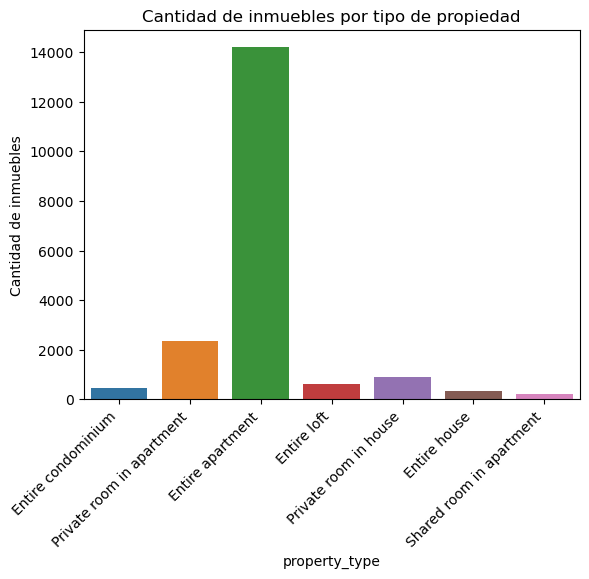

In [253]:
count_tipo_propiedad = sns.countplot(x = airbnb.property_type)
count_tipo_propiedad.set_xticklabels(count_tipo_propiedad.get_xticklabels(),  rotation=45, horizontalalignment='right');
count_tipo_propiedad.set(ylabel = "Cantidad de inmuebles", title = "Cantidad de inmuebles por tipo de propiedad");

La amplia mayoría (+14000) de las propiedades son departamentos enteros

In [254]:
orden_count_barrio = airbnb.neighbourhood_cleansed.value_counts().index.to_list()

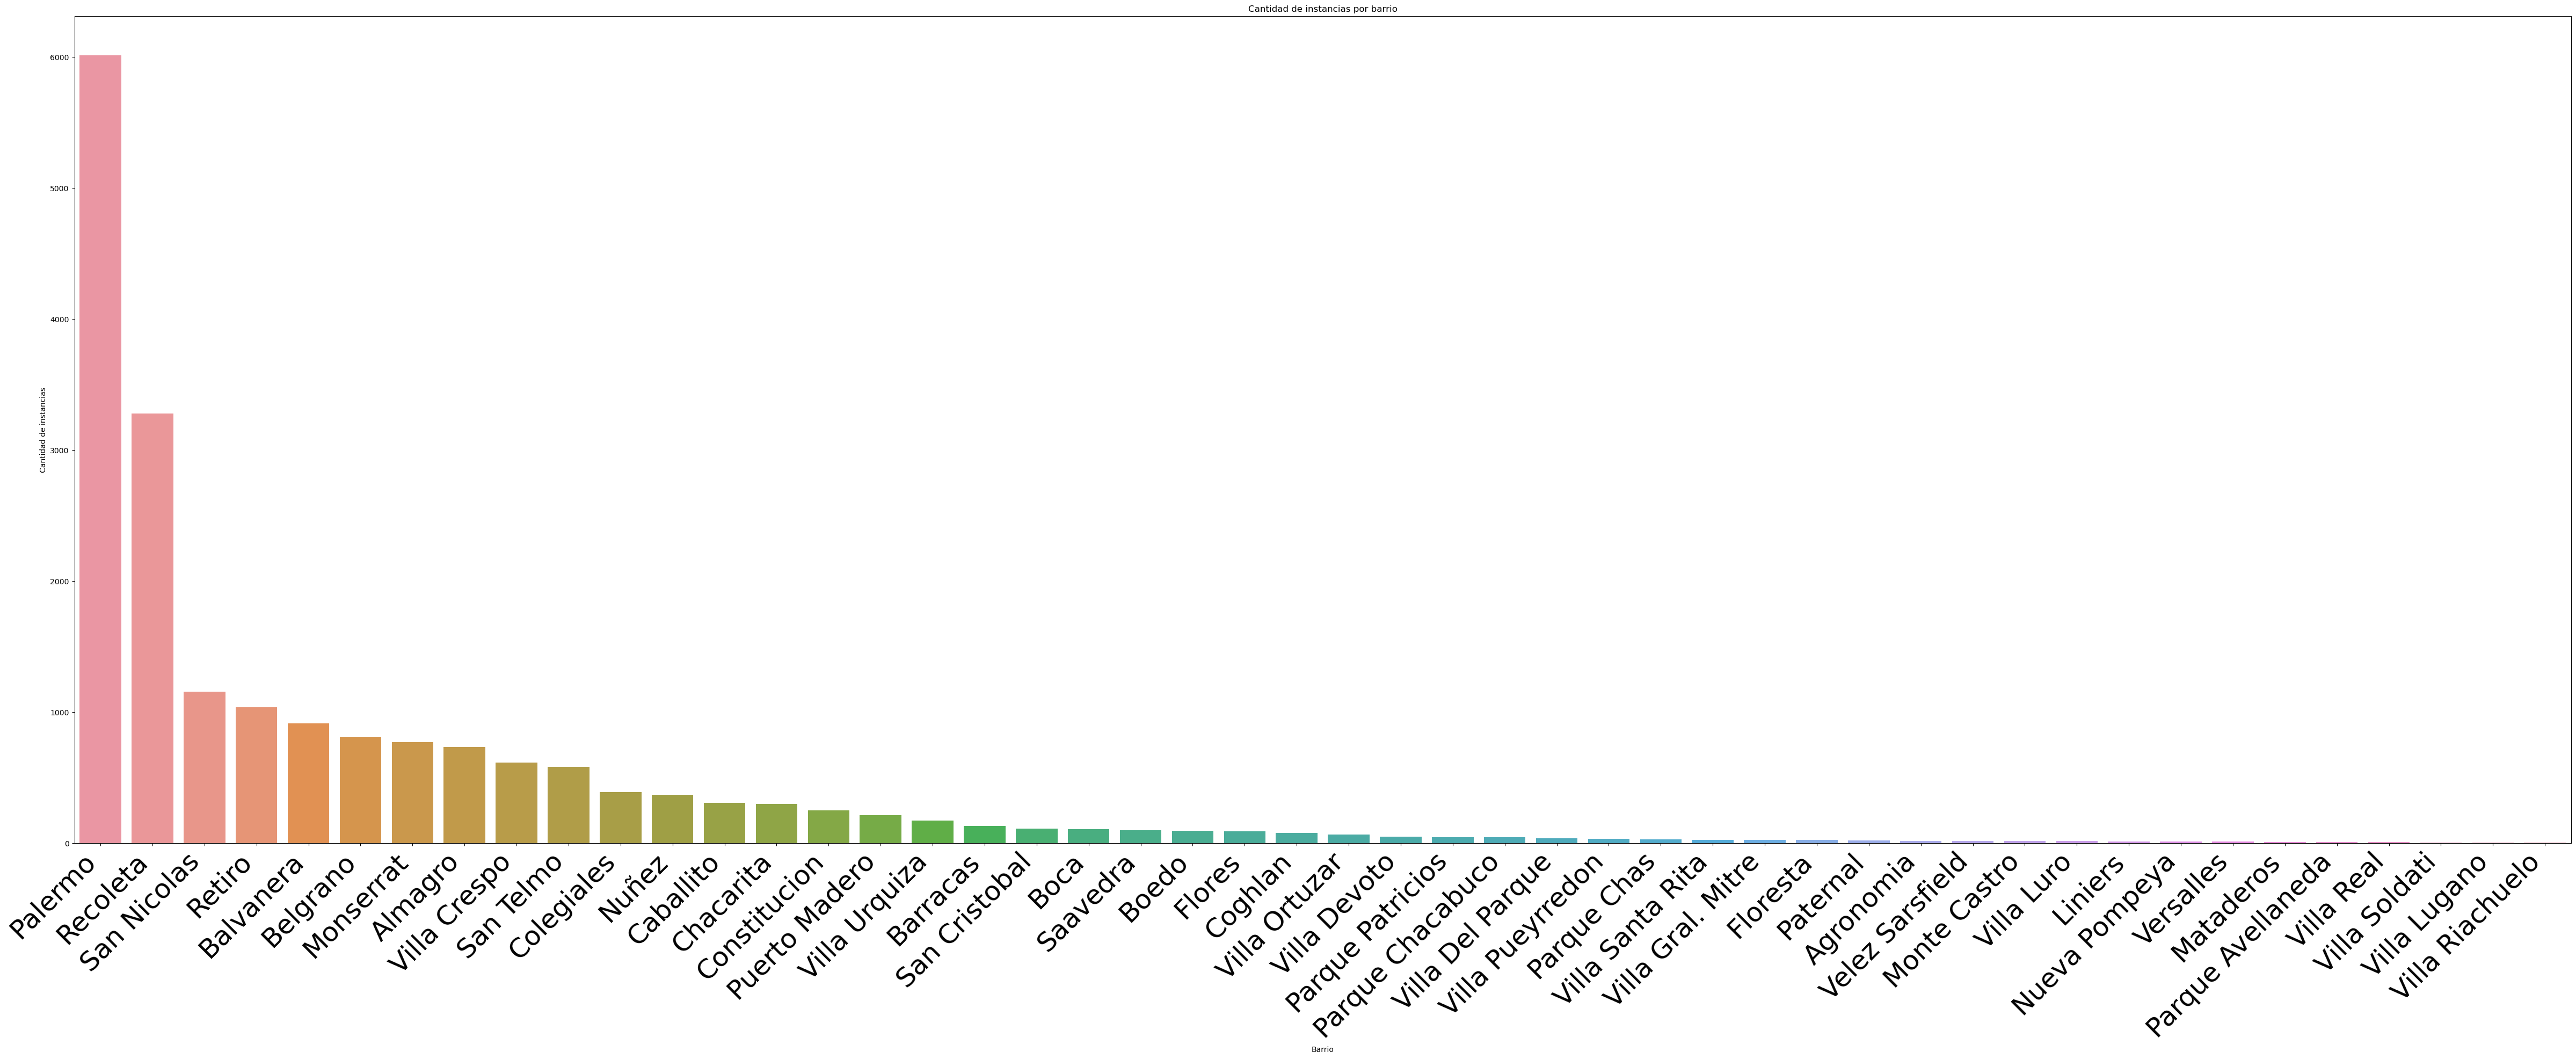

In [255]:
plt.figure(figsize = (60,20))
count_barrio = sns.countplot(x = airbnb.neighbourhood_cleansed, order = orden_count_barrio)
count_barrio.set_xticklabels(count_barrio.get_xticklabels(),  rotation=45, horizontalalignment='right', fontdict = {'fontsize': 36});
font = {'weight': 'normal', 'size' : 45}
count_barrio.set(ylabel = "Cantidad de instancias", xlabel = "Barrio", title = "Cantidad de instancias por barrio");
matplotlib.rc('font', **font)


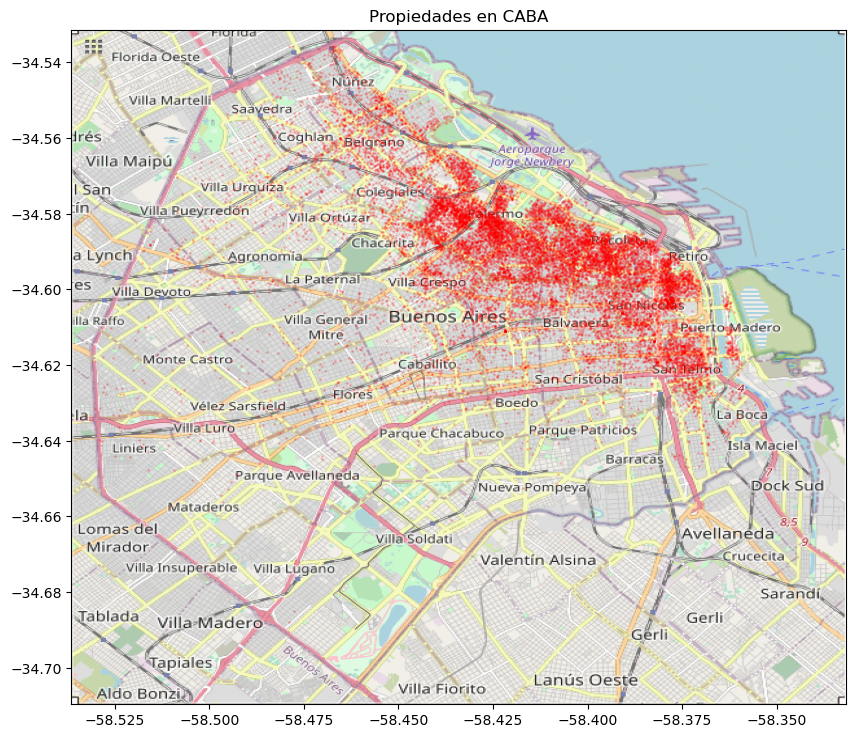

In [321]:
matplotlib.rcdefaults()
mapa_caba = plt.imread('CABA.png')
BBox = [-58.5365, -58.3316, -34.7097, -34.5314]
fig, ax = plt.subplots(figsize = (10, 10))
ax.scatter(airbnb.longitude, airbnb.latitude, alpha= 0.18, c='r', s=1)
ax.set_title('Propiedades en CABA')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(mapa_caba, zorder=0, extent = BBox, aspect= 'equal');

Las propiedades listadas en Airbnb, como puede observarse, se concentran en el noreste de la ciudad, principalmente Palermo, Recoleta, San Nicolás y Retiro.

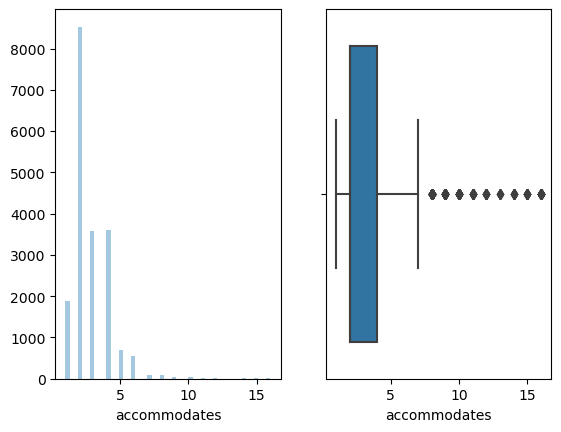

In [257]:
plt.subplot(1,2,1)
sns.distplot(airbnb.accommodates, kde = False)
plt.subplot(1,2,2)
sns.boxplot(airbnb.accommodates)

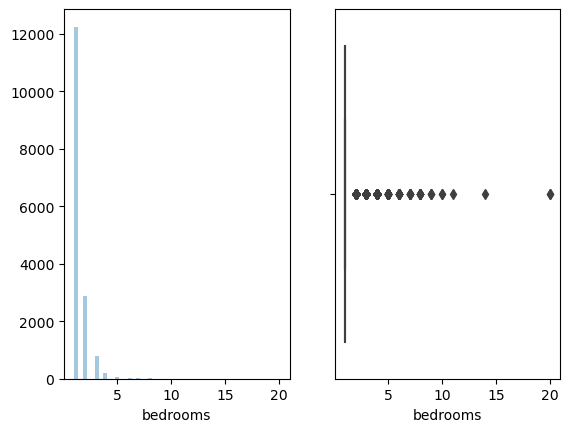

In [258]:
plt.subplot(1,2,1)
sns.distplot(airbnb.bedrooms, kde = False)
plt.subplot(1,2,2)
sns.boxplot(airbnb.bedrooms)

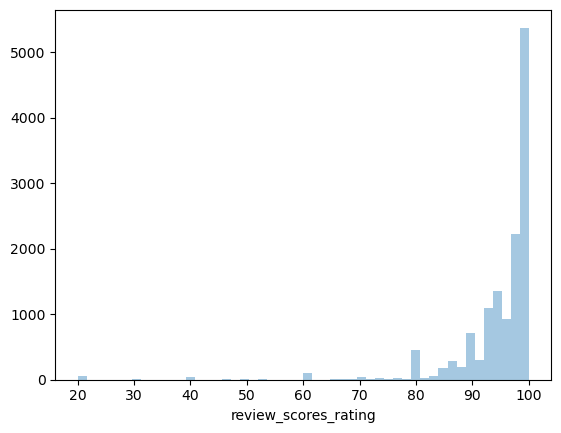

In [259]:
sns.distplot(airbnb.review_scores_rating, kde = False)

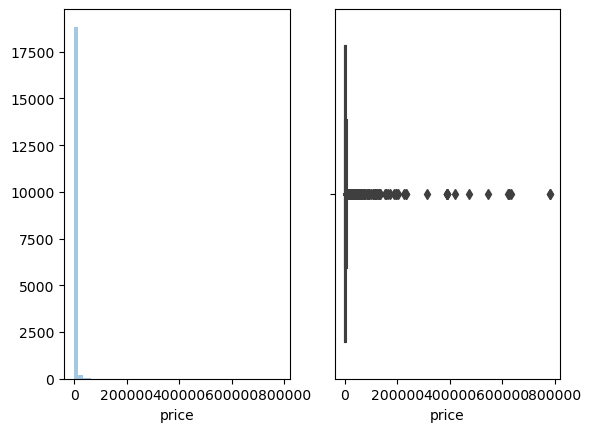

In [260]:
plt.subplot(1,2,1)
sns.distplot(airbnb.price, kde = False)
plt.subplot(1,2,2)
sns.boxplot(airbnb.price)

Al observar la distribución de los precios es evidente que algo anda mal, hay muchas propiedades con precios ridículamente desorbitantes.

In [261]:
airbnb.loc[airbnb.price>200000].head(5)

,name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bedrooms,beds,price,...,review_scores_location,review_scores_value,baños,es_privado,Pileta,TV,Aire acondicionado,Desayuno,Estacionamiento gratis,Cocina
2770,EXC. UBICACION PALERMO SOHO SUBTE,f,Palermo,-34.58553,-58.42271,Entire apartment,3,1.0,2.0,234404.0,...,NaN,NaN,1.0,1.0,0,1,1,0,0,1
4610,50%OFF ❤️ THE BEST POLO VIEW with FREE PARKING,f,Palermo,-34.57161,-58.42949,Entire apartment,3,2.0,1.0,474362.0,...,10.0,9.0,1.0,1.0,1,1,1,1,1,1
7966,Ayacucho 2076 Recoleta,f,Recoleta,-34.58782,-58.38776,Entire apartment,3,1.0,1.0,632656.0,...,10.0,10.0,1.0,1.0,0,1,1,0,0,1
8098,Charlone 555,f,Chacarita,-34.58271,-58.45271,Entire apartment,5,1.0,1.0,622470.0,...,10.0,10.0,1.5,1.0,1,1,1,0,1,1
8938,Departamento en Palermo. Excelente ubicación!!,f,Palermo,-34.57679,-58.42206,Entire apartment,3,1.0,1.0,390772.0,...,10.0,10.0,1.0,1.0,0,1,1,0,0,1


In [262]:
airbnb.loc[airbnb.price>20000]

,name,host_is_superhost,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,bedrooms,beds,price,...,review_scores_location,review_scores_value,baños,es_privado,Pileta,TV,Aire acondicionado,Desayuno,Estacionamiento gratis,Cocina
16,apartament in San Telmo,f,Monserrat,-34.61540,-58.37780,Entire apartment,2,NaN,2.0,27354.0,...,NaN,NaN,NaN,NaN,0,0,0,0,0,0
59,Recoleta great penthouse w/private terrace &g...,t,Recoleta,-34.59278,-58.38760,Private room in apartment,11,4.0,6.0,25009.0,...,10.0,9.0,5.5,1.0,1,1,1,0,1,1
63,Historic French Style Villa,f,Monserrat,-34.60842,-58.37316,Entire house,6,3.0,3.0,27354.0,...,NaN,NaN,2.5,1.0,0,1,1,1,1,1
125,Great place to 12 Tango lovers,f,Balvanera,-34.60485,-58.39448,Entire apartment,12,6.0,9.0,31184.0,...,9.0,9.0,5.0,1.0,0,1,1,0,0,1
139,"Barrancas Home, in Belgrano. Sunny full apartm...",f,Belgrano,-34.56286,-58.45430,Entire apartment,2,2.0,1.0,29363.0,...,10.0,9.0,2.0,1.0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20116,Departamento 4 ambientes en Palermo Soho,f,Palermo,-34.58623,-58.42432,Entire apartment,4,3.0,3.0,58601.0,...,NaN,NaN,2.5,1.0,1,1,1,0,1,1
20175,Hab. Compartida / Cama individual (Buenos Aires),f,San Nicolas,-34.60432,-58.38024,Shared room in apartment,1,1.0,1.0,53145.0,...,NaN,NaN,1.5,0.0,0,0,0,1,0,1
20187,Amplio monoambiente moderno en Palermo Hollywood,f,Palermo,-34.57764,-58.44075,Entire apartment,2,NaN,1.0,34379.0,...,NaN,NaN,1.0,1.0,1,1,1,0,0,1
20216,Departamento en Recoleta,f,Recoleta,-34.59799,-58.39159,Entire apartment,2,NaN,1.0,29308.0,...,NaN,NaN,1.0,1.0,0,0,1,0,0,1


Observando algunos de estos departamentos en la página de Airbnb se puede observar que los precios son el resultado de un error en la recolección por lo que no son datos útiles. De hecho hasta podrían ser contraproducentes para el modelo, por lo que tendrán que ser descartados.

In [263]:
airbnb['z_precio'] = stats.zscore(airbnb.price)

In [264]:
airbnb['outlier'] = airbnb['z_precio']> 3

Para eliminar los *outliers* se calcula el z-score (representa la cantidad de desviaciones estándar a la media de un valor dado) y se establece un límite. Los datos cuyo valor absoluto de su z-score sea mayor a dicho límite son descartados. En este caso el límite es Z-score = 3, lo que equivaldría a que, en una distribución normal, el 99,865% de los datos no serían excluidos.

In [265]:
airbnb.drop(airbnb[airbnb.outlier].index, inplace = True) #Removiendo outliers
airbnb.drop(["z_precio","outlier"], axis = 1, inplace = True) #Removiendo columnas auxiliares "outlier" y "Z_precio"

El precio medio es 2268.0


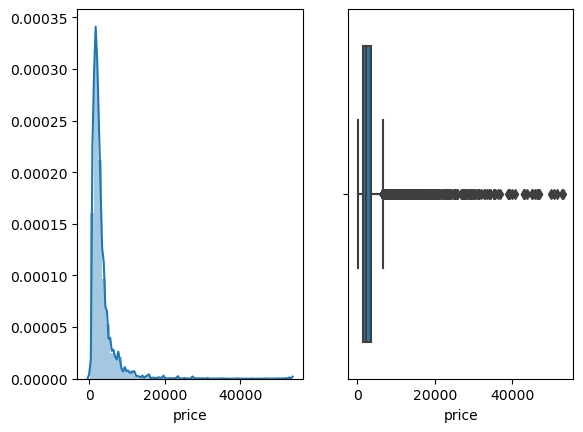

In [266]:
plt.subplot(1,2,1)
sns.distplot(airbnb.price, kde = True,)
plt.subplot(1,2,2)
sns.boxplot(airbnb.price);
print("El precio medio es {}".format(airbnb.price.median())) #Nótese que se utiliza la mediana en lugar de la media

En resumen, una propiedad tipo listada en Airbnb sería un departamento entero en Palermo, para 2 personas, con buen puntaje de reseña y un precio de poco más 2000 pesos por noche

**Relación entre el precio y las distintas variables**

<ins>Tipo de Propiedad</ins>

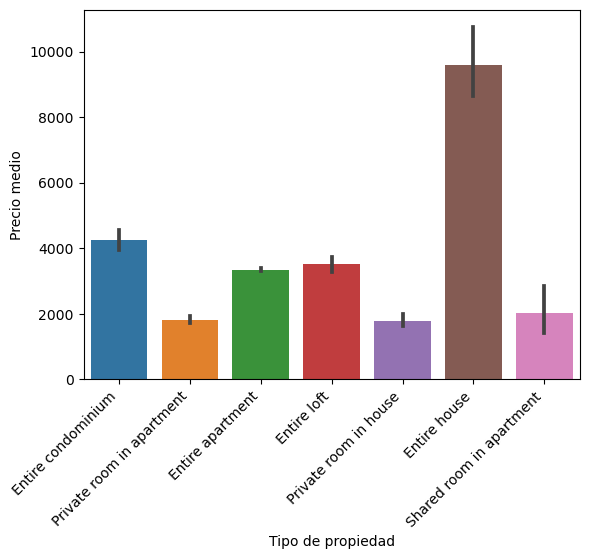

In [267]:
tipo_propiedad_precio = sns.barplot(x = airbnb.property_type, y = airbnb.price)
tipo_propiedad_precio.set_xticklabels(tipo_propiedad_precio.get_xticklabels(),  rotation=45, horizontalalignment='right');
tipo_propiedad_precio.set(ylabel = "Precio medio", xlabel = "Tipo de propiedad");

Una casa entera es significativamente mas cara que el resto de las propiedes, mientras que las más económicas son los dormitorios compartidos en un departamento.

<ins>Ubicación</ins>

In [268]:
#Solo graficaré los barrios con mas de 100 propiedades para reducir el ruido
#Barrios con pocas  propiedades pueden tener una media de precio mayor por simple casualidad

barrios_mas_cien = airbnb[["neighbourhood_cleansed","price"]].loc[airbnb.neighbourhood_cleansed.isin(orden_count_barrio[:20])]


In [269]:
barrio_precio_orden = barrios_mas_cien.groupby("neighbourhood_cleansed").mean() \
.sort_values(by = "price", ascending= False).index

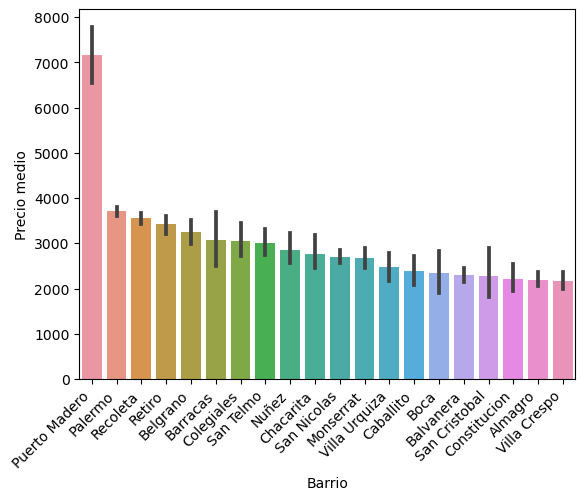

In [270]:
barrio_precio = sns.barplot(x = barrios_mas_cien.neighbourhood_cleansed, y = barrios_mas_cien.price, order= barrio_precio_orden)
barrio_precio.set_xticklabels(barrio_precio.get_xticklabels(),  rotation=45, horizontalalignment='right');
barrio_precio.set(ylabel = "Precio medio", xlabel = "Barrio");

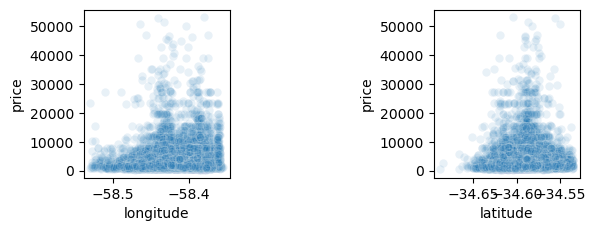

In [271]:
plt.subplot(2,3,1)
longitud_precio = sns.scatterplot(x = airbnb.longitude, y = airbnb.price, alpha = 0.1)
plt.subplot(2,3,3)
sns.scatterplot(x = airbnb.latitude, y = airbnb.price, alpha = 0.1)

El precio medio de las propiedades en Puerto Madero es, por amplia diferencia, el mayor. En cuanto a la longitud y la latitud no hay ninguna correlación individual entre estas variables y el precio

<ins>Host y Reviews</ins>

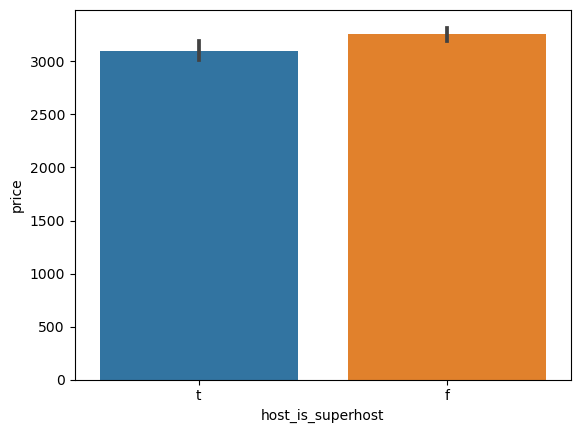

In [272]:
sns.barplot(x = airbnb.host_is_superhost, y = airbnb.price);

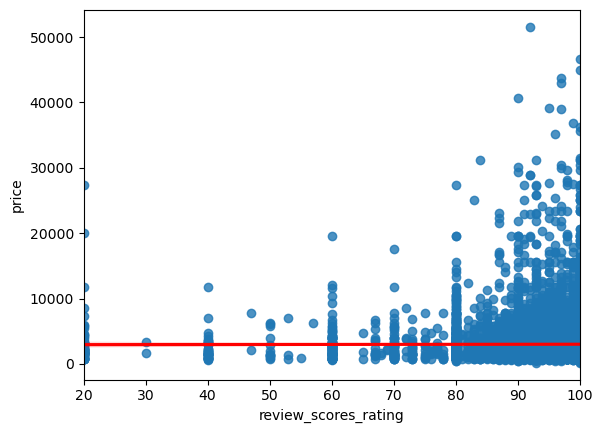

In [273]:
sns.regplot(x = airbnb.review_scores_rating, y = airbnb.price, line_kws = {"color" : "r"})

Ni el calificativo de *superhost* ni el puntaje de las reseñas tiene correlación alguna con el precio de las propiedades. 

<ins>Número de dormitorios, baños y huéspedes</ins>

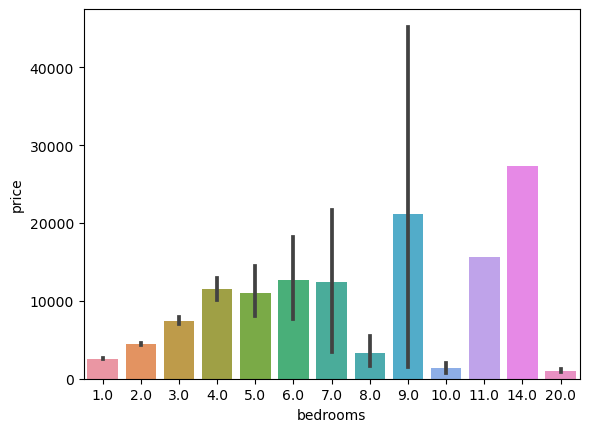

In [274]:
sns.barplot(x = airbnb.bedrooms, y = airbnb.price);

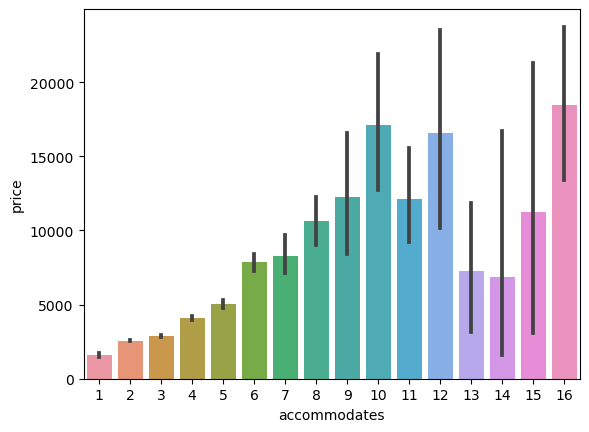

In [275]:
sns.barplot(x = airbnb.accommodates, y = airbnb.price);

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


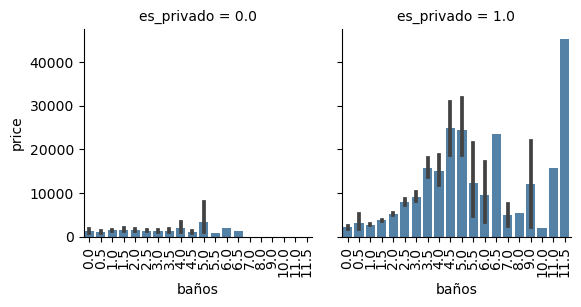

In [277]:
bp = sns.FacetGrid(data = airbnb, col = "es_privado")
bp.map(sns.barplot, "baños", "price", color = "steelblue")
for axes in bp.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


Tanto para la cantidad de dormitorios como para la de baños y de huéspedes cuanto mayor es esta, mayor es el precio. Esto se mantiene hasta determinada cantidad en el que el número de observaciones por valor es muy limitado, generándose ruido.
En el caso de los dormitorios esta cantidad es 5, en el de los huéspedes es 9 y en el de los baños, 3.
Respecto a esta ultima categoría, es importante destacar que la correlación entre un mayor número de baños y un mayor precio solamente se mantiene cuando los baños son privados. 

Por último, aquellas propiedades con baños privados tienen, en promedio, un nivel de precios considerablemente mayor que las que tienen baños compartidos.

<ins>Comodidades</ins>

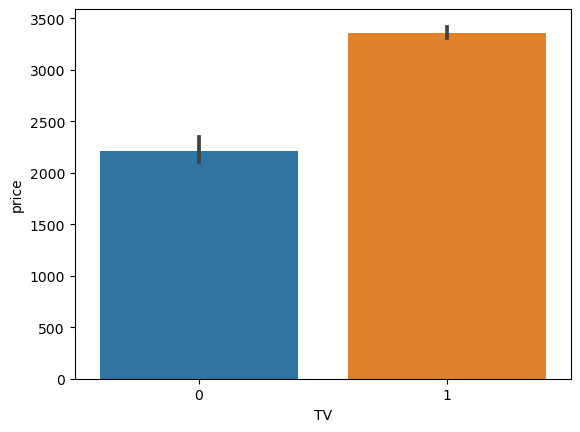

In [278]:
sns.barplot(x = airbnb["TV"], y = airbnb.price);

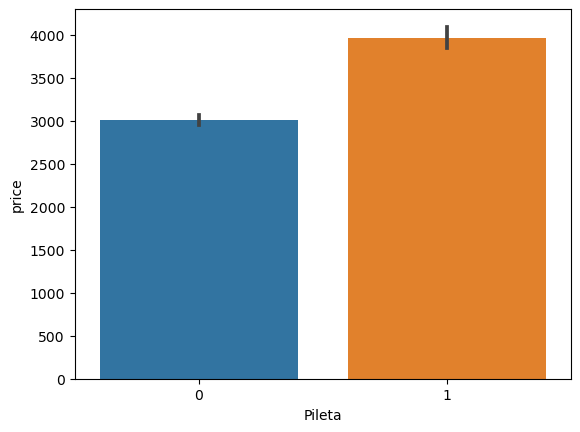

In [279]:
sns.barplot(x = airbnb["Pileta"], y = airbnb.price);

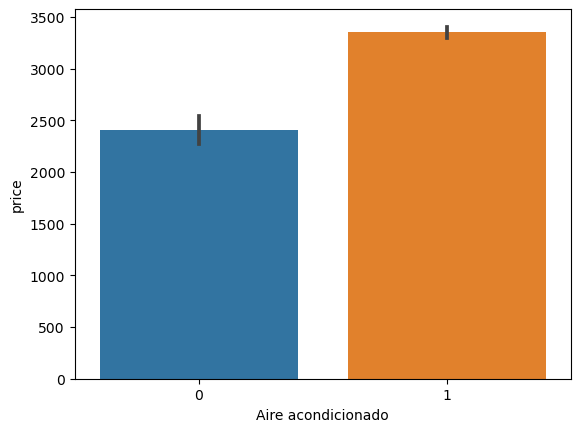

In [280]:
sns.barplot(x = airbnb["Aire acondicionado"], y = airbnb.price);

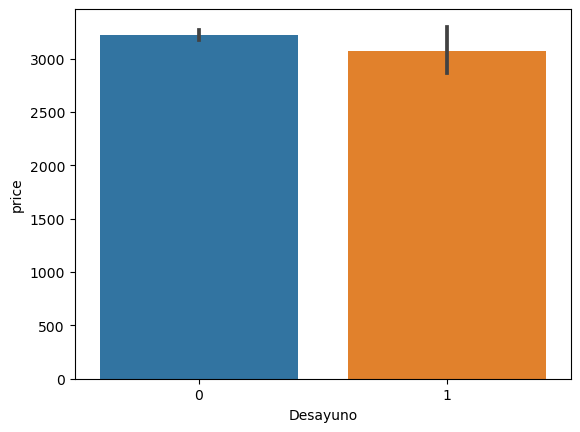

In [281]:
sns.barplot(x = airbnb["Desayuno"], y = airbnb.price);

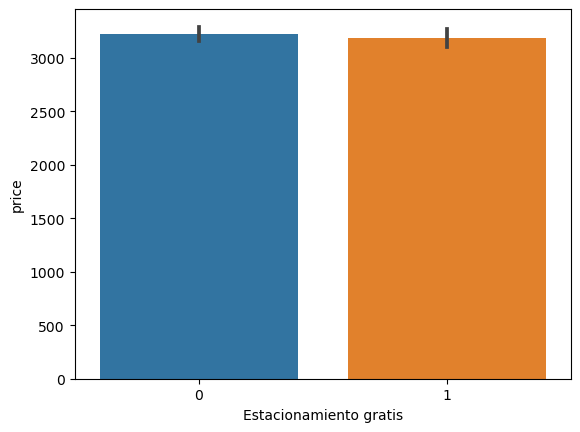

In [282]:
sns.barplot(x = airbnb["Estacionamiento gratis"], y = airbnb.price);

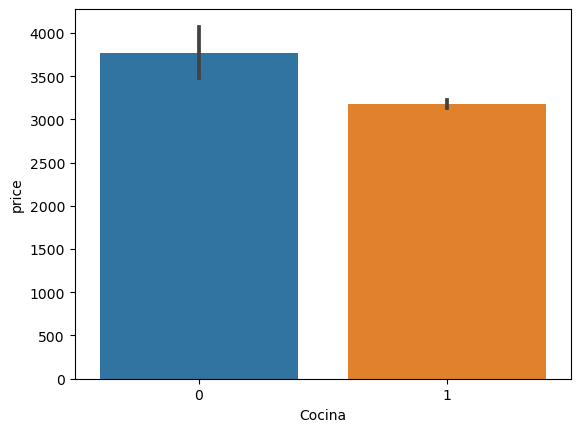

In [283]:
sns.barplot(x = airbnb["Cocina"], y = airbnb.price);

Hay una tendencia marcada hacia mayores precios en propiedades con televisores, piletas o aires acondicionados. Esto no es así para aquellas con desayuno, estacionamiento gratis o cocina

## 3. El modelo

El modelo que utilizaré para este problema de regresión es *XGBoost (Extreme Gradient Boosting)* que funciona agrupando una gran cantidad de árboles de decisión (clasificadores débiles) para obtener un modelo robusto. 

[XGBoost: A Scalable Tree Boosting System](https://www.researchgate.net/publication/310824798_XGBoost_A_Scalable_Tree_Boosting_System)

Primero, sin embargo, hay que separar los datos en un conjunto de entrenamiento (80%) y uno de prueba (20%), eliminar las columnas que no tengan poder predictivo, transformar las variables categóricas a numéricas,  y rellenar los valores faltantes.

**Selección de columnas y transformación de variables categóricas a numéricas**

In [75]:
columnas_inutiles = ['name', 'host_is_superhost', 'neighbourhood_cleansed', 
                     'review_scores_rating', 'review_scores_accuracy',
                     'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'Desayuno', 'Estacionamiento gratis', 
                     'Cocina']

In [76]:
airbnb.drop(columnas_inutiles, axis = 1, inplace = True)

Para transformar la columna "property_type" de categórica a numérica utilizaré *One-Hot Encoding*. Esto consiste en crear una columna para cada categoría con 1 en las instancias que pertenecen a dicha clase y 0 en las que no. Un efecto colateral positivo de codificar de esta forma la variable es que no es necesario imputar los valores faltantes.

In [77]:
airbnb = pd.get_dummies(airbnb)

**Separación de los datos**

In [78]:
train, test = train_test_split(airbnb, test_size = 0.2, random_state = 30)

**Imputación de valores faltantes**

Los valores faltantes los imputaré con la media. Es importante recalcar que estos valores se calculan solo sobre el conjunto de entrenamiento para evitar *data leakage* (filtrado de datos), es decir, la presencia de información externa al conjunto de entrenamiento en este conjunto, lo que puede llevar a sobreestimar la capacidad del modelo.

In [79]:
imputer_num = SimpleImputer(strategy = 'median')

train[:] = imputer_num.fit_transform(train)
test[:] = imputer_num.transform(test)

In [80]:
train.isna().sum()

latitude                                   0
longitude                                  0
accommodates                               0
bedrooms                                   0
beds                                       0
price                                      0
baños                                      0
es_privado                                 0
Pileta                                     0
TV                                         0
Aire acondicionado                         0
property_type_Entire apartment             0
property_type_Entire condominium           0
property_type_Entire house                 0
property_type_Entire loft                  0
property_type_Private room in apartment    0
property_type_Private room in house        0
property_type_Shared room in apartment     0
dtype: int64

**Ajuste de Hiperparámetros del modelo**

Para seleccionar los mejores valores para los hiperparámetros utilizaré *Grid Search*, que permite probar distintas combinaciones, y *Cross Validation*, que divide al set de entrenamiento en k partes en los que se evalúa al modelo (después de entrenarse en las otras k-1 partes) para dar un mejor estimativo de su desempeño. La función objetivo sera el error cuadrático y el desempeño de cada conjunto de hiperparámetros se medirá con el opuesto del error absoluto medio.

In [82]:
x_train = train.drop("price", axis = 1)
y_train = train["price"]
x_test = test.drop("price", axis = 1)
y_test = test["price"]

In [100]:
modelo = XGBRegressor()

In [160]:
parametros = {'learning_rate': [0.0005, 0.001, 0.005],
              'max_depth': [6, 7, 8],
              'subsample': [0.9],
              'colsample_bytree': [0.8],
              'n_estimators': [1000, 2000, 3000],
                'reg_alpha' : [0.3, 0.03, 0.003]}

In [161]:
reg = GridSearchCV(modelo, parametros, cv=5, n_jobs = -1,
                   scoring='neg_mean_absolute_error', verbose=2, 
                   refit=True)

In [162]:
reg.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   55.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed: 23.3min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [163]:
reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
reg.best_score_

-1377.2263579442338

In [169]:
y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

In [172]:
mean_absolute_error(y_test_pred, y_test)

1309.4846365906658

### Resultados

El modelo da un error medio absoluto de aproximadamente \\$1309 en el test de entrenamiento. Sin embargo esto no dice mucho ya que un error de \\$1300 en una propiedad que cuesta, por ejemplo, \\$2000, es prácticamente inadmisible. Por otra parte, este mismo error en una propiedad con un valor de \\ $40000 exhibiría un muy buen desempeño.

Conviene entonces ver el error absoluto medio en 4 categorías, según el precio real de las propiedades:

- Menor a 3000
- Entre 3000 y 8000
- Entre 8000 y 20000
- Mayor a 20000

In [182]:
mae_tres_mil = mean_absolute_error(y_train[y_train < 3000],  y_pred[y_train < 3000])
print("El error medio absoluto para propiedades con un valor inferior a 3000 es aproximadamente {}".\
      format(round(mae_tres_mil), 2))

El error medio absoluto para propiedades con un valor inferior a 3000 es aproximadamente 599.0


In [194]:
mae_tres_ocho = mean_absolute_error(y_train[y_train.between(3000, 8000)],  y_pred[y_train.between(3000, 8000)])
print("El error medio absoluto para propiedades con un valor entre 3000 y 8000 es aproximadamente {}".\
      format(round(mae_tres_ocho), 2))

El error medio absoluto para propiedades con un valor entre 3000 y 8000 es aproximadamente 1550.0


In [196]:
mae_ocho_veinte = mean_absolute_error(y_train[y_train.between(8000, 20000)],  y_pred[y_train.between(8000, 20000)])
print("El error medio absoluto para propiedades con un valor entre 8000 y 20000 es aproximadamente {}".\
      format(round(mae_ocho_veinte), 2))

El error medio absoluto para propiedades con un valor entre 8000 y 20000 es aproximadamente 5421.0


In [199]:
mae_veinte_mil = mean_absolute_error(y_train[y_train > 20000],  y_pred[y_train > 20000])
print("El error medio absoluto para propiedades con un valor superior a 20000 es aproximadamente {}".\
      format(round(mae_veinte_mil), 2))

El error medio absoluto para propiedades con un valor superior a 20000 es aproximadamente 15360.0


Conviene también ver individualmente algunas predicciones

In [302]:
resultados = pd.DataFrame(data = {"Predicción": y_test_pred, "Precio Real":y_test})

In [303]:
resultados.head(20)

,Predicción,Precio Real
1039,6412.457520,7813.0
33,2305.736084,3517.0
8900,1259.976318,1407.0
4184,1086.682373,860.0
17893,1132.790161,1094.0
5155,2349.019531,3908.0
17986,1882.589111,3126.0
9955,2085.359131,2500.0
4910,2056.373779,3047.0
5669,3466.565430,2900.0


Si bien la mayoría de las predicciones son bastantes acertadas, hay algunas que difieren del valor real por un buen margen, como por ejemplo la de la propiedad 3201, la cual sobrevalúa considerablemente. Sin embargo, en este caso, al entrar al [link de la publicación](https://www.airbnb.es/rooms/10333824?source_impression_id=p3_1609798496_PzCVQ%2F%2FqZRV66HgE&guests=3&adults=3&check_in=2021-06-14&check_out=2021-06-18) de dicha propiedad, el precio por noche es, en realidad, de $\unicode{x20AC}21$, muy cercano al valor que predijo, en pesos, el modelo.

**Entrenar el modelo con todos los datos**

Una vez que se conoce el desempeño del modelo, este puede ser entrenado en todos los datos para mejorarlo.

In [209]:
X = pd.concat([x_train, x_test])
Y = pd.concat([y_train, y_test])


model = XGBRegressor( learning_rate=0.001,  
                      colsample_bytree = 0.8,
                      subsample = 0.9, 
                      n_estimators=2000, 
                      reg_alpha = 0.3,
                      max_depth=8,  
                    )
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.001, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Información valiosa

El modelo, además de ser una herramienta para estimar el precio, nos permite saber que variables son las más importantesen la determinación del mismo, complementando el análisis efectuado en la parte 2 de este proyecto.

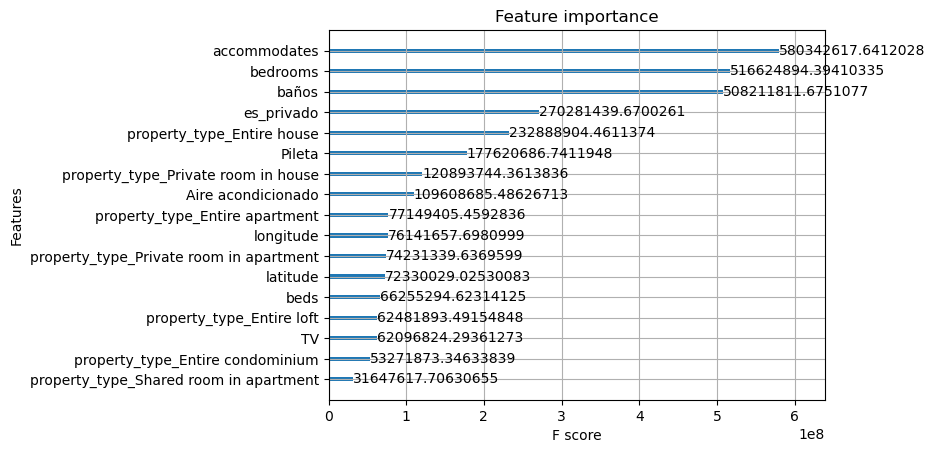

In [232]:
xgboost.plot_importance(model, importance_type = 'gain')

Como puede observarse las variables que más marcan la diferencia en el precio son la cantidad de huéspedes, camas y baños. 

## Conclusiones

El modelo hace un trabajo aceptable en predecir los precios de las propiedades en Airbnb (hay que recordar que estos tienen una variabilidad muy grande y dos propiedades exactamente iguales podrían estar a precios bastante diferentes). 
De todas formas, este podría tener un desempeño aún mejor si se lo entrenara con un mayor volumen de datos ($\approx 16000$ instancias en el conjunto de entrenamiento es un número pequeño para problemas de inteligencia artificial).

El modelo puede ser una herramienta muy útil para, dada una propiedad, poder tener un precio estimado inicial, el cual se puede ir ajustando con la demanda. Además, permite conocer una ganancia aproximada sobre la propiedad en caso de ser listada en Airbnb pudiendo así compararla con otros tipos de usos de la misma (como alquilarla o directamente venderla).

**Extra:** guardaré el modelo para poder utilizarlo en una aplicación web

In [372]:
import pickle

In [374]:
pickle.dump(model, open("price_model.pickle.dat", "wb"))

In [323]:
x_train.head(1)

,latitude,longitude,accommodates,bedrooms,beds,baños,es_privado,Pileta,TV,Aire acondicionado,property_type_Entire apartment,property_type_Entire condominium,property_type_Entire house,property_type_Entire loft,property_type_Private room in apartment,property_type_Private room in house,property_type_Shared room in apartment
18961,-34.60636,-58.42631,4.0,2.0,3.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [392]:
malabia = {"latitude": [-34], "longitude": [-58], "accommodates": [11.0], "bedrooms": [11], "beds": [11], "baños" : [11],
 "es_privado" : [1], "Pileta": [1], "TV": [1], "Aire acondicionado": [1],  "property_type_Entire apartment": [1],
 "property_type_Entire condominium" : [0], "property_type_Entire house": [0],
 "property_type_Entire loft": [0], "property_type_Private room in apartment": [0],
 "property_type_Private room in house": [0], "property_type_Shared room in apartment" : [0]}




In [393]:
malabia = pd.DataFrame(malabia)

In [394]:
model.predict(malabia)

array([11068.481], dtype=float32)

In [385]:
list(malabia.values())[1]

[-58.417596]